In [1]:
import pandas as pd
df_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol','Malic acid', 'Ash','Alcalinity of ash', 'Magnesium','Total phenols', 'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity', 'Hue','OD280/OD315 of diluted wines','Proline']

In [2]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
sc=StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
#finding the eigen values and eigen vector using numpy
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vacs = np.linalg.eig(cov_mat)
#Although the numpy.linalg.eig function was designed to decompose nonsymmetric square matrices, you may  nd that it returns complex eigenvalues in certain cases.
#A related function, numpy.linalg.eigh, has been implemented to decompose Hermetian matrices, which is a numerically more stable approach to work with symmetric matrices such as the covariance matrix; numpy.linalg.eigh always returns real eigenvalues.
eigen_vals
eigen_vacs[:,0]

array([ 0.14669811, -0.24224554, -0.02993442, -0.25519002,  0.12079772,
        0.38934455,  0.42326486, -0.30634956,  0.30572219, -0.09869191,
        0.30032535,  0.36821154,  0.29259713])

The variance explained ratio of an eigenvalue λj is simply the fraction of an eigenvalue λj and the total sum of the eigenvalues:
λj /∑ λj

In [4]:
#Using the NumPy cumsum function, we can then calculate the cumulative sum of explained variances, which we will plot via matplotlib's step function:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where = 'mid', label='cumulative align center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [5]:
eigen_pairs = [(np.abs(eigen_vals[i] ), eigen_vacs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs

[(4.8923083032737411,
  array([ 0.14669811, -0.24224554, -0.02993442, -0.25519002,  0.12079772,
          0.38934455,  0.42326486, -0.30634956,  0.30572219, -0.09869191,
          0.30032535,  0.36821154,  0.29259713])),
 (2.4663503157592297,
  array([ 0.50417079,  0.24216889,  0.28698484, -0.06468718,  0.22995385,
          0.09363991,  0.01088622,  0.01870216,  0.03040352,  0.54527081,
         -0.27924322, -0.174365  ,  0.36315461])),
 (1.4280997275048448,
  array([-0.11723515,  0.14994658,  0.65639439,  0.58428234,  0.08226275,
          0.18080442,  0.14295933,  0.17223475,  0.1583621 , -0.14242171,
          0.09323872,  0.19607741, -0.09731711])),
 (1.0123346209044923,
  array([ 0.20625461,  0.1304893 ,  0.01515363, -0.09042209, -0.83912835,
          0.19317948,  0.14045955,  0.33733262, -0.1147529 ,  0.07878571,
          0.02417403,  0.18402864,  0.05676778])),
 (0.84906459334502582,
  array([-0.18781595,  0.56863978, -0.29920943, -0.04124995, -0.02719713,
          0.1406454

In [6]:
w = np.hstack((eigen_pairs[0][1][:,np.newaxis],
              eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n',w)

Matrix W:
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


 By executing the preceding code, we have created a 13×2-dimensional projection matrix W from the top two eigenvectors. Using the projection matrix, we can now transform a sample x (represented as 1×13-dimensional row vector) onto the PCA subspace obtaining x′ , a now two-dimensional sample vector consisting of two new features:x′= xW

In [7]:
X_train_std[0].dot(w)

array([ 2.59891628,  0.00484089])

Similarly, we can transform the entire 124×13-dimensional training dataset onto the two principal components by calculating the matrix dot product:
X′= XW

In [8]:
X_train_pca = X_train_std.dot(w)

visualization the above PCA model

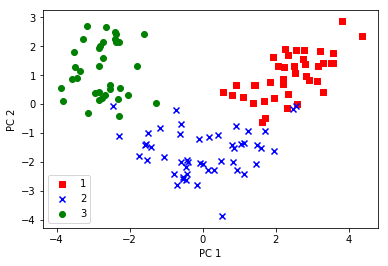

In [9]:
colors = ['r', 'b','g']
markers = ['s', 'x','o']
fig = plt.figure()
ax1 = fig.add_subplot(111)
for l, c, m in zip(np.unique(y_train), colors, markers):
    ax1.scatter(X_train_pca[y_train == l, 0], X_train_pca[y_train == l,1], c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.show()

# Principal Component Analysis in Scikit learn
Although the verbose approach in the previous subsection helped us to follow the inner workings of PCA, we will now discuss how to use the PCA class implemented in scikit-learn. PCA is another one of scikit-learn's transformer classes, where we  rst  t the model using the training data before we transform both the training data and the test data using the same model parameters. Now, let's use the PCA from scikit- learn on the Wine training dataset, classify the transformed samples via logistic regression, and visualize the decision regions via the plot_decision_region function that we de ned in Chapter 2, Training Machine Learning Algorithms
for Classi cation:

In [10]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

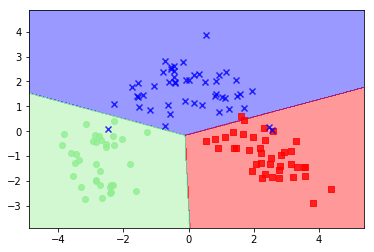

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca,y_train)
plot_decision_regions(X_train_pca,y_train,classifier=lr)
plt.show()

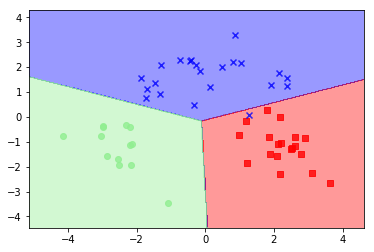

In [12]:
plot_decision_regions(X_test_pca,y_test,classifier=lr)
plt.show()

If we are interested in the explained variance ratios of the different principal components, we can simply initialize the PCA class with the n_components parameter set to None, so all principal components are kept and the explained variance ratio can then be accessed via the explained_variance_ratio_ attribute:

In [13]:
pca = PCA(n_components = None)
pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([ 0.37329648,  0.18818926,  0.10896791,  0.07724389,  0.06478595,
        0.04592014,  0.03986936,  0.02521914,  0.02258181,  0.01830924,
        0.01635336,  0.01284271,  0.00642076])

Note that we set n_components=None when we initialized the PCA class so that it would return all principal components in sorted order instead of performing a dimensionality reduction.

let's summarize the key steps of the LDA approach:
1. Standardize the d -dimensional dataset ( d is the number of features).
2. For each class, compute the d -dimensional mean vector.
3. Construct the between-class scatter matrix SB and the within-class scatter matrix Sw .
4. Compute the eigenvectors and corresponding eigenvalues of the matrix S−1S .
5. Choose the k eigenvectors that correspond to the k largest eigenvalues to construct a d × k -dimensional transformation matrix W ; the eigenvectors are the columns of this matrix.
6. Project the samples onto the new feature subspace using the transformation matrix W .

The assumptions that we make when we are using LDA are that the features are normally distributed and independent of each other.
Also, the LDA algorithm assumes that the covariance matrices for the individual classes are identical. However, even if we violate those assumptions to a certain extent, LDA may still work reasonably well in dimensionality reduction and classi cation tasks

## Computing the Scatter Matrices

In [17]:
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print(mean_vecs[label-1])

[ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]
[-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]
[ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]


within class scatter martix
SW =∑c Si
    i=1
    
This is calculated by summing up the individual scatter matrices Si of each individual class i :

Si = ∑c(x−m)(x−m)^T

In [20]:
d = 13 # number of feature
S_W = np.zeros((d,d))
for label,mv in zip(range(1,4),mean_vecs):
    class_scatter = np.zeros((d,d))
    for row in X_train[y_train == label]:
        row,mv = row.reshape(d,1), mv.reshape(d,1)
        class_scatter += (row-mv).dot((row-mv).T)
    S_W += class_scatter
print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 13x13


The assumption that we are making when we are computing the scatter matrices is that the class labels in the training set are uniformly distributed. However, if we print the number of class labels, we see that this assumption is violated:

In [22]:
print('Class label distribution: %s' % np.bincount(y_train)[1:])

Class label distribution: [40 49 35]


In [25]:
d = 13 # number of feature
S_W = np.zeros((d,d))
for label,mv in zip(range(1,4),mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('Scaled Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Scaled Within-class scatter matrix: 13x13


### computing between class square matrix

In [32]:
mean_overall = np.mean(X_train_std,axis=0)
d=13# number of feature
S_B = np.zeros((d,d))
for i,mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i+1, :].shape[0]
    mean_vec = mean_vec.reshape(d,1)
    mean_overall = mean_overall.reshape(d,1)
    
S_B +=n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))


Between-class scatter matrix: 13x13


## Selecting linear discriminants for the new feature subspace

In [33]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
#sorting eigen values in descending order
eigen_pairs = [np.abs(eigen_vals[i], eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,key=lambda k:k[0], reverse = True)
for eigen_vals in eigen_pairs:
    print(eigen_vals[0])


(269.799757873+0j)
(2.81194438296e-14+0j)
(2.14483178831e-14+0j)
(1.68689335069e-14+0j)
(1.68689335069e-14+0j)
(1.40782997476e-14+0j)
(1.20113839905e-14+0j)
(1.20113839905e-14+0j)
(4.40949335143e-15+0j)
(4.40949335143e-15+0j)
(1.95107674682e-15+0j)
(2.16267478387e-17+0j)
0j


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


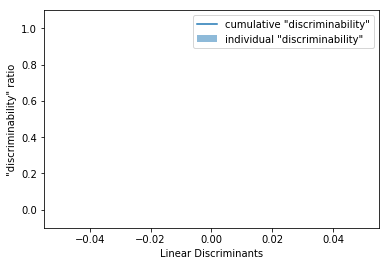

In [37]:
# plot the linear discriminants by decreasing eigenvalues
# tot = sum(eigen_vals.real)
# discr = [(i/tot) for i in sorted(eigen_vals.real, reverse = True)]
# cum_discr = np.cumsum(discr)
# plt.bar(range(1,14), discr, alpha = 0.5,align='center', label="individual label")
# plt.step(range(1,14), cum_discr,where='mid', label="cumulative Label")
# plt.show()
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 14), discr, alpha=0.5, align='center',label='individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid',label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()
#skipping the above implementation as it was getting a bit confusing.

# Implementing LDA via SCIKIT Learn

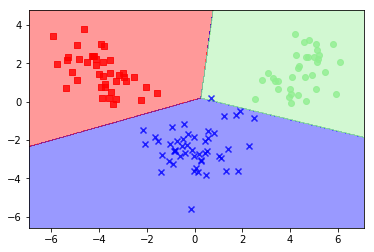

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
lr = LogisticRegression()
lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier = lr)
plt.show()

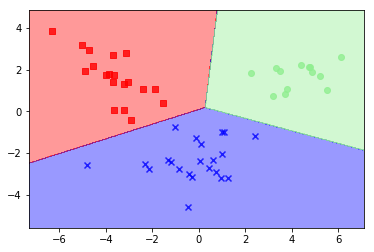

In [45]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier = lr)
plt.show()

# Implementing a kernel principal component analysis in Python

In [46]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np


In [48]:
def rbf_kernel_pca(X, gamma, n_components):
    sq_dists = pdist(X, 'sqeuclidean')
    mat_sq_dists = sqareform(sq_dists)
    k = exp(-gamma* mat_sq_dists)
    
    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # Obtaining eigenpairs from the centered kernel matrix
    # numpy.eigh returns them in sorted order
    eigvals, eigvecs = eigh(K)
    
    # Collect the top k eigenvectors (projected samples)
    X_pc = np.column_stack((eigvecs[:, -i] for i in range(1, n_components + 1)))
    return X_pc